# Linear Regression Model

Linear regression is the most simple and foundational machine learning model (DataCamp, 2024), whose purpose is to find the best fitting line between the input variable(s) and the output variable (GeeksForGeeks, 2025). Since the output values are visible during training, the linear regression is one of supervisied machine learning models (GeeksForGeeks, 2025). In this notebook, we will
* create a toy dataset using scikit-learn
* train a linear regression model, and
* evaluate it

## Downloading the California Housing dataset

The California Housing dataset is one of simple and common datasets used in studying machine learning model. It contains more than 20 thousands numeric data to predict the house value for California district (Scikit-Learn, n.d.). For detail information, please look at [here](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

In [1]:
import os
os.getcwd()

'd:\\ai_review\\ml_review\\supervised\\regression'

In [2]:
os.chdir("d:/ai_review/")

if not os.path.exists("./data"):
    os.mkdir("./data",)

In [3]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# download as Pandas dataframe
california_housing_value_data = fetch_california_housing(data_home="./data", as_frame=True)
house_price_df: pd.DataFrame = california_housing_value_data['frame']
house_price_df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


## Data Exploration and Analysis

Since this is a toy dataset, we don't need to do much. Nevertheless, we will do basic analysis.

In [4]:
house_price_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Data Visualization

A picture says louder than words. Visualization (graphs) makes us more familiar with our data. Therefore, let's make some plots.

In [5]:
features = california_housing_value_data.feature_names
target = california_housing_value_data.target_names

features, target

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

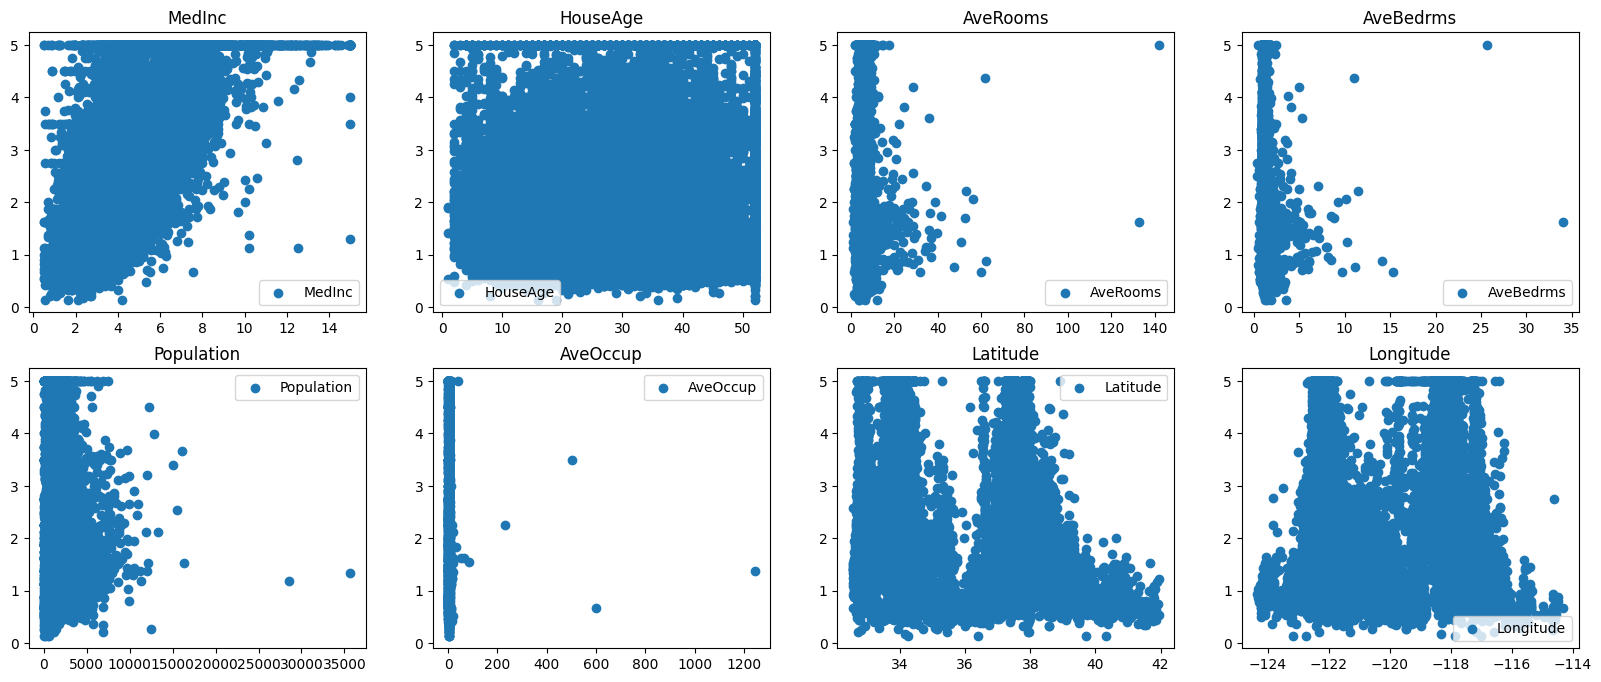

In [6]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(20,8))
axes = axis.flatten()

for col, ax in zip(features, axes):
    ax.scatter(house_price_df[col], house_price_df[target[0]], label=col)
    ax.legend()
    ax.set_title(col)

plt.show()

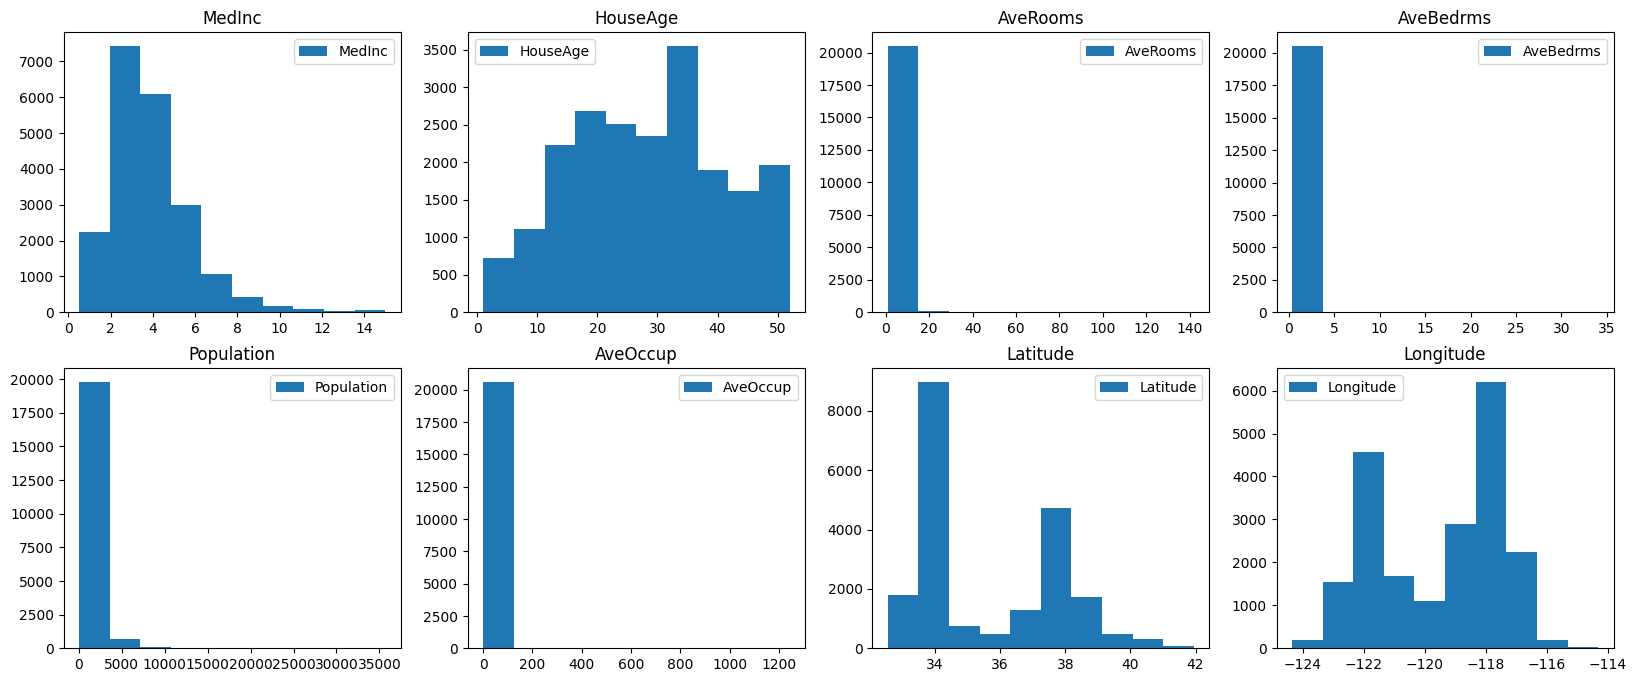

In [7]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(20,8))
axes = axis.flatten()

features = california_housing_value_data.feature_names
target = california_housing_value_data.target_names

for col, ax in zip(features, axes):
    ax.hist(house_price_df[col], label=col)
    ax.legend()
    ax.set_title(col)

plt.show()

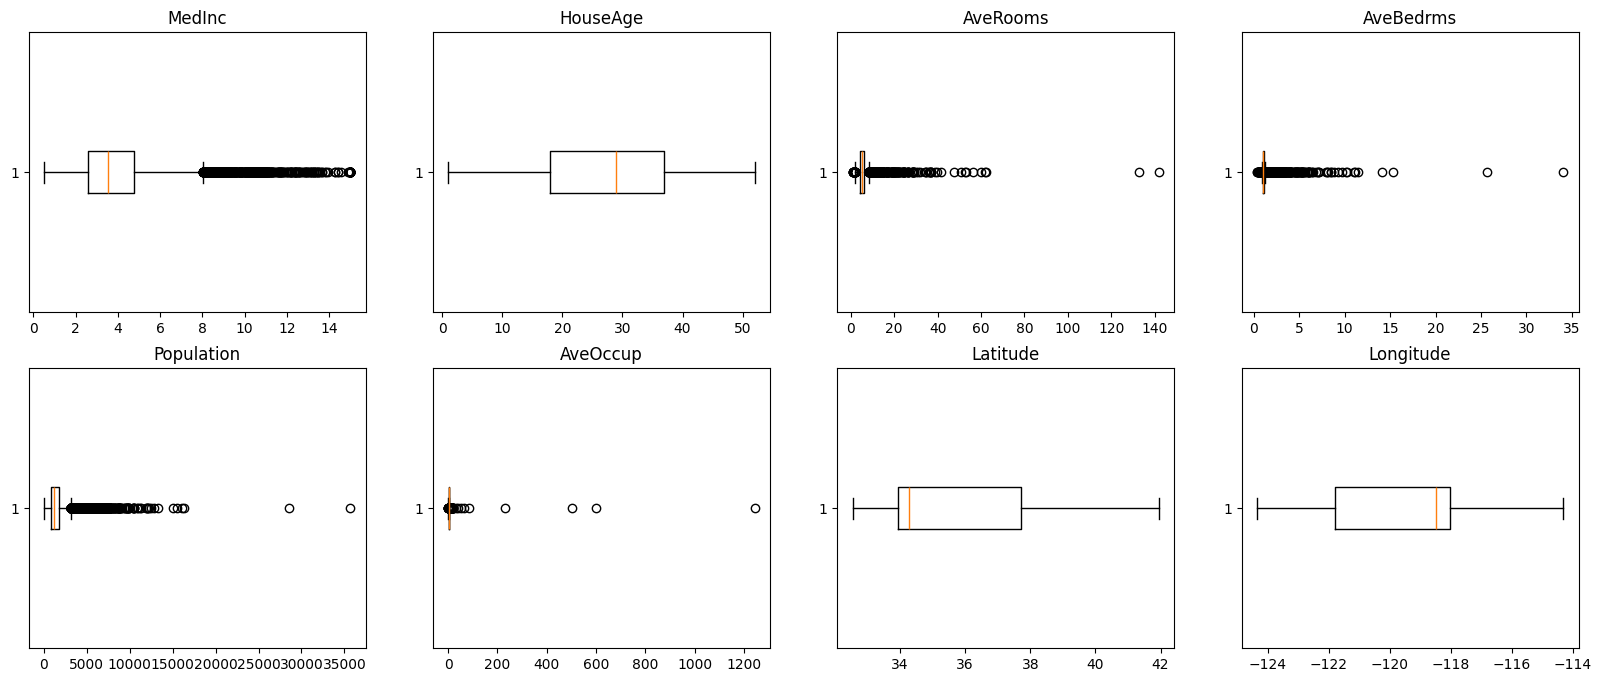

In [8]:
fig, axis = plt.subplots(2, 4, figsize=(20,8))
axes = axis.flatten()

for col, ax in zip(features, axes):
    ax.boxplot(house_price_df[col], orientation="horizontal")
    ax.set_title(col)
plt.show()

As we can see, there are a few outliers in our dataset. Let's replace them with median values in the data preprocessing step.

## Data Preprocessing

Before we train our first model, we need to randmomly split our dataset into two: train and test.

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    house_price_df[features], house_price_df[target[0]], test_size=0.2, random_state=42
)

In [10]:
def replace_outliers_with_median(X, factor: float):
    X = pd.DataFrame(X).copy()
    for i in range(X.shape[1]):
        x = pd.Series(X.iloc[:,i]).copy()
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)
        median = x.median()
        X.iloc[((X.iloc[:,i] < lower_bound) | (X.iloc[:,i] > upper_bound)),i] = median 
    return X

In [11]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [12]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

pipeline = Pipeline(steps = [
    ("outliers", FunctionTransformer(replace_outliers_with_median, kw_args={"factor": 1.5})),
    ("skewness", PowerTransformer(method="yeo-johnson")),
    ("scalers", StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [13]:
X_train.shape

(16512, 8)

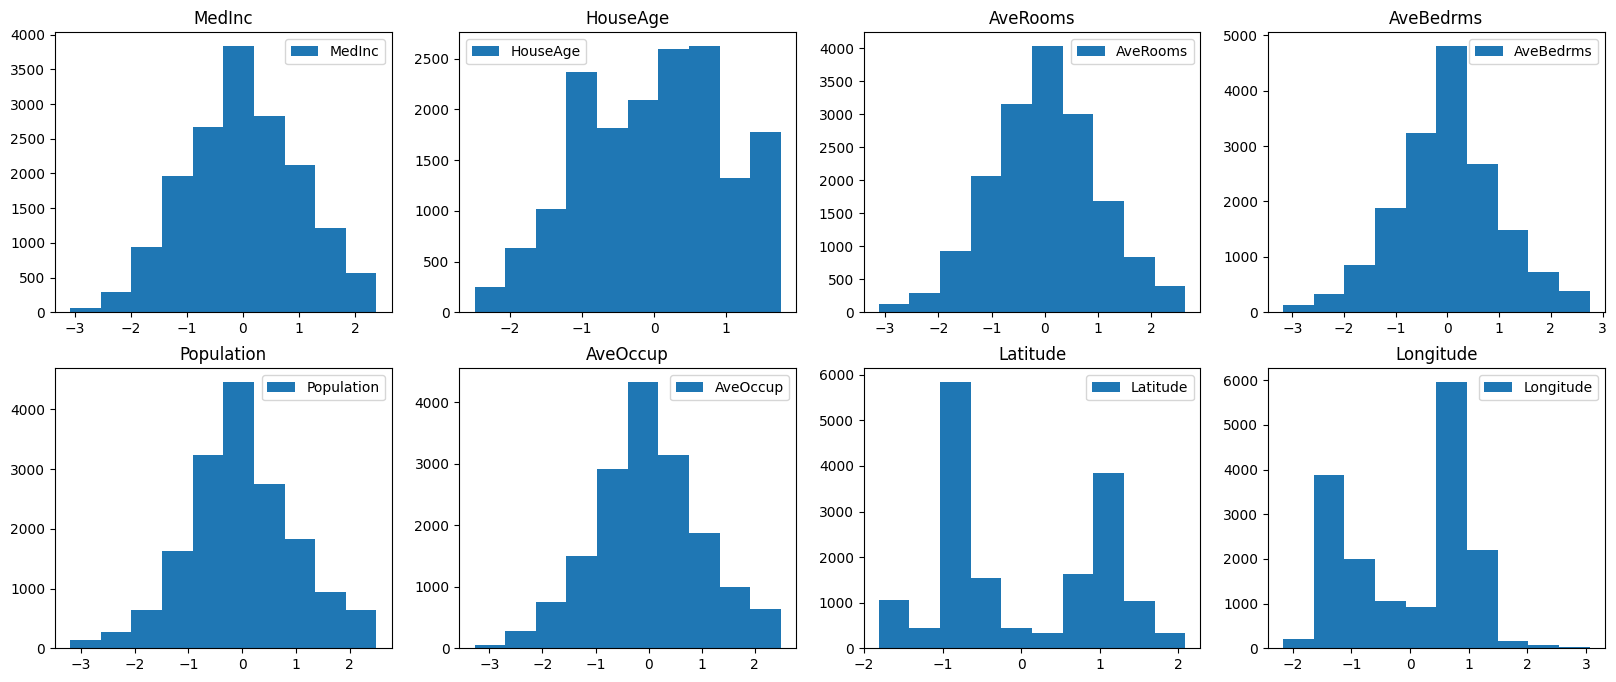

In [14]:
fig, axis = plt.subplots(2, 4, figsize=(20,8))
axes = axis.flatten()

features = california_housing_value_data.feature_names
target = california_housing_value_data.target_names

for i, col_ax in enumerate(zip(features, axes)):
    col, ax = col_ax
    ax.hist(X_train[:, i], label=col)
    ax.legend()
    ax.set_title(col)

plt.show()

## Linear Regression Model

A simple Linear Regression model can be represented by the following equation (GeeksForGeeks, 2025):

> $Y = \theta_0 + \sum_{i=1}^{n} \theta_i x_i$

* $\theta_0$ = the interception point of the line
* $\theta_i$ = the coefficient of input variables
* $x_i$ = the input or independent features
* $Y$ = the target or dependent variable

To use a Linear Regression model, our dataset should meet the following criteria:
- Linearity: the input and output must be linearly related (GeeksForGeeks, 2025)
- Independence of errors: the errors should not correlate between each other (DataCamp, 2024)
- Homoscedasticity: the errors should have constant variance across all input values (DataCamp, 2024)
- Normality of residual: the errors must be in normal distribution (bell-shape) (GeeksForGeeks)

## Workflow in Linear Regression

First, a Linear Regression model defines the coefficients ($\theta_0, ..., \theta_i$) randomly (GeeksForGeeks, 2025), and predicts the output (GeeksForGeeks). Then, it calculates the error, the difference between the actual and predicted values, using a cost function. For example, a mean square error (MSE): $Cost\ Function\ (J) = 1/n \sum_{i=0}^{n} (y_i - \bar{y}_i)^2$. An optimizer function, (Gradient Descent, Adam, etc.,) minimizes this error value and updates the coefficients in the direction of reducing errors (GeeksForGeeks, 2025).

In this notebook, we will use a Scikit-Learn framework to build, train, and evaluate a Linear Regression model.

## Model Training

In [15]:
from sklearn.linear_model import LinearRegression

# build model
lr_model = LinearRegression()

# train model
lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Model Evaluation

After training a model, it is essential to evaluate its performance. There are a variety of metrics to measure how much possiblity our model can make an error. For regression model, we can use:

* Mean Sequare Error (MSE)
    * calculate the difference between the actual values and predicted values
    * square the difference so that positive and negative values don't cancel out each other
    * Equation: $ MSE = 1/n \sum_{i=1}^n (y_i - \bar(y)_i)^{2} $
    * sensitive to outliers
    * lower $ \rightarrow $ better

* Mean Absolute Error (MAE)
    * calculate by averaging the absolute difference
    * equation: $MAE = 1/n \sum_{i=1}^n |y_i - \bar(y)_i| $
    * not sensitive to outliers
    * lower $ \rightarrow $ better

* Root Mean Square Error (RMSE)
    * square root of mean square error
    * equation: $RMSE = \sqrt{1/n \sum_{i=1}^{1} (y_i - \bar{y}_i)^2}$
    * scale independent
    * lower $ \rightarrow $ better
    * sensitive to outliers

In [16]:
# evaluate model's performance on the train dataset using R2 Score.
lr_model.score(X_train, y_train)

0.5154159517854142

In [17]:
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error

y_pred = lr_model.predict(X_test)

print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.4932644466640478
RMSE: 0.8148808616511386
MSE: 0.664030818685302


It seems like our dataset has a non-linear relationship between the input features and target features, so our linear regression model cannot learn much things. R2 score on the training data set is a bit higher than that on the test data. Normally, it indicates overfitting. To address it, we can use Lasso Regression (L1 Regularization model), Ridge Regression (L2 Regularization model), or Elastic Net Regression model (a hybrid L1-L2 regularization model). Nevertheless, we won't do anything about it right now since our model doesn't meet our expectation.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_pipeline = Pipeline(steps=[
    ("polynomial_features", PolynomialFeatures(degree=5)),
    ("lr_model", LinearRegression())
])

poly_pipeline.fit(X_train, y_train)

# evaluate model's performance on the train dataset using R2 Score.
print(f"R2 Score Train: {poly_pipeline.score(X_train, y_train)}")

y_pred_poly = poly_pipeline.predict(X_test)

print(f"R2 Score Test: {r2_score(y_test, y_pred_poly)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_poly)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly)}")

R2 Score Train: 0.7762902526552163
R2 Score Test: 0.6539414174615559
RMSE: 0.6734079547760752
MSE: 0.45347827355569653


Before we train our model, we generate a polynomial features from our preprocessed data. Our model performance imporoves a lot. So does overfitting. The higher degree we use, there will be more overfitting. Let's test it with Elastic Net Regression.

In [19]:
from sklearn.linear_model import ElasticNet

poly_elastic_pipeline = Pipeline(steps=[
    ("polynomial_features", PolynomialFeatures(degree=5)),
    ("lr_model", ElasticNet(alpha=3e-3, max_iter=500, random_state=0, selection="random"))
])

poly_elastic_pipeline.fit(X_train, y_train)

# evaluate model's performance on the train dataset using R2 Score.
print(f"R2 Score Train: {poly_elastic_pipeline.score(X_train, y_train)}")

y_pred_poly_elastic = poly_elastic_pipeline.predict(X_test)

print(f"R2 Score Test: {r2_score(y_test, y_pred_poly_elastic)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_poly_elastic)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly_elastic)}")

R2 Score Train: 0.7463778221382624
R2 Score Test: 0.6873807443717599
RMSE: 0.6400461540750265
MSE: 0.40965907934623264


d:\ai_review\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+03, tolerance: 2.207e+00
  model = cd_fast.enet_coordinate_descent(


Now, our model improves a little bit. We need to fine-tune these parameters:

* `degree`
* `alpha`
* `max_iter`

to get the best performance. For now, we know why our linear model is not working well. Thus, let's stop here and move on to other models like ensemble, tree, or neural network models.